In [45]:
# Imports
""" %pip install pandas
%pip install pyarrow
%pip install fastparquet
%pip install prettytable """

%pip install seaborn
%pip install numpy
%pip install matplotlib
%pip install sklearn

import prettytable
import pandas as pd
from collections import defaultdict
import seaborn as sns
from prettytable import PrettyTable
from matplotlib import pyplot as plt
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [2]:
path = 'BasedeDadosPNS-2019/'
file = 'PNS2019.parquet'
read_parquet = pd.read_parquet(path+file)

In [3]:
colunas_selecionadas = ['V0001', 'C001', 'C006', 'C008', 'C009', 'V00201','V00202','V00203','V00204','V00205','V01401','V01402','V01403','V01404','V01405', 'V02701', 'V02702']

In [4]:
violencia = read_parquet[colunas_selecionadas]

In [5]:
# Altera o nome das colunas
novo_nome_colunas = ['UF', 'Qtd_Moradores', 'Sexo', 'Idade','Cor_Raca', 'V_Ofensa','V_Grito','V_Rede_Social','V_Ameaca','V_Destruiu','F_Tapa','F_Empurrou','F_Soco','F_Enforca','F_Ameaca', 'S_T_Toque', 'S_T_Ameaca']
def substitur_nome_colunas(df, novo_nome_colunas):
    df.columns = novo_nome_colunas
    return df

violencia = substitur_nome_colunas(violencia, novo_nome_colunas)

In [6]:
# Altera as colunas dicotomicas, mantendo o valor 1 porem alterando o valor dois para 0
colunas_dicotomicas = ['V_Ofensa','V_Grito','V_Rede_Social','V_Ameaca','V_Destruiu','F_Tapa','F_Empurrou','F_Soco','F_Enforca','F_Ameaca', 'S_T_Toque', 'S_T_Ameaca']

def alteraDicotomico (df, colunas_dicotomicas):
    for coluna in colunas_dicotomicas:
        df.loc[df[coluna] == 2.0, coluna] = 0
    return df

violencia = alteraDicotomico(violencia, colunas_dicotomicas)

In [9]:
t = PrettyTable(['Coluna', 'Total', 'Ausentes', 'Ausentes (%)', 'Não Ausentes', 'Não Ausentes (%)'])
for col in violencia.columns:
    if any(violencia[col].isna()):
        t.add_row([col, len(violencia[col]), violencia[col].isna().sum(), round(violencia[col].isna().sum() / len(violencia[col]) * 100, 2), len(violencia[col]) - violencia[col].isna().sum(), round((len(violencia[col]) - violencia[col].isna().sum()) / len(violencia[col]) * 100, 2)])
print(t)

+--------+-------+----------+--------------+--------------+------------------+
| Coluna | Total | Ausentes | Ausentes (%) | Não Ausentes | Não Ausentes (%) |
+--------+-------+----------+--------------+--------------+------------------+
+--------+-------+----------+--------------+--------------+------------------+


In [8]:
violencia = violencia.dropna()

In [10]:
# funcao que altera todas as colunas do tipo float para int usando a funcao .loc

def float_to_int(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df.loc[:,col] = df[col].astype('int64')
    return df

violencia = float_to_int(violencia)

C:\Users\admin\AppData\Local\Temp\ipykernel_240\1493254759.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,col] = df[col].astype('int64')


In [11]:
# Add a column named 'violentado' at the end of the dataframe
violencia['Violentado'] = 0

In [27]:
# Set the value of the column 'Violentado' to 1 if at least one of the columns in 'colunas_dicotomicas' is 1
for col in colunas_dicotomicas:
    violencia.loc[violencia[col] == 1, 'Violentado'] = 1
    
# copy the dataframe to a new dataframe
violencia_model = violencia.copy()

# Remove the columns in 'colunas_dicotomicas' from the dataframe violencia_model
violencia_model = violencia_model.drop(colunas_dicotomicas, axis=1)

In [52]:
# Set column 'Qtd_Moradores' to float64
violencia_model['Qtd_Moradores'] = violencia_model['Qtd_Moradores'].astype('float64')

<AxesSubplot:>

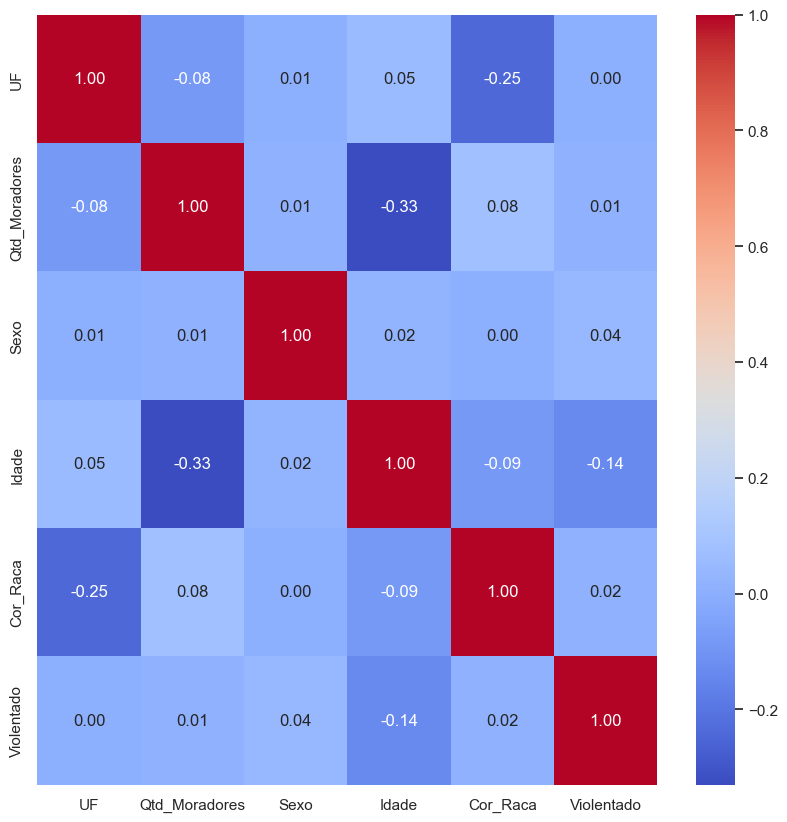

In [53]:
corr = violencia_model.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')

In [54]:
violencia_model.to_excel('violencia_model.xlsx', index=False)
violencia_model.to_csv('violencia_model.csv', index=False)
violencia_model.to_parquet('violencia_model.parquet', index=False)

In [55]:
# Normalizing dataframe by feature clipping the lines with more than 5 moradores
def normalize_df(df):
    df = df[df['Qtd_Moradores'] <= 5]
    return df

violencia_model = normalize_df(violencia_model)

In [56]:
# Remove all lines which the total of occurrences of a value in the column 'Idade' is less than 100
def remove_idade(df):
    df = df.groupby('Idade').filter(lambda x: len(x) > 500)
    return df

violencia_model = remove_idade(violencia_model)

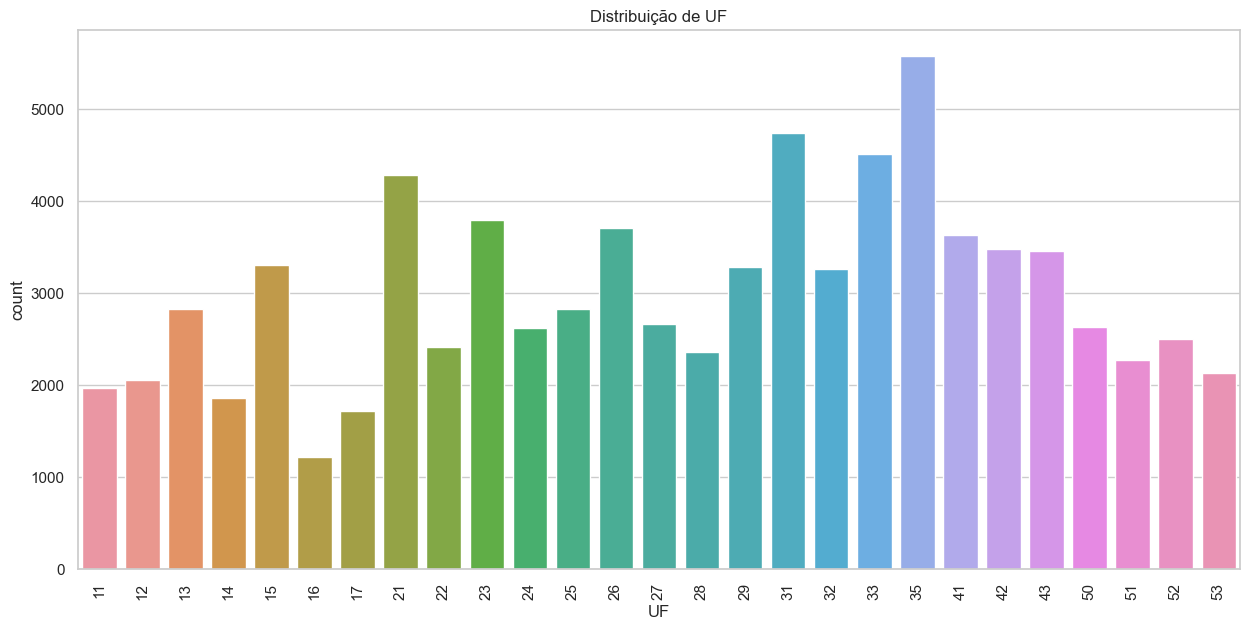

Frequente:  35


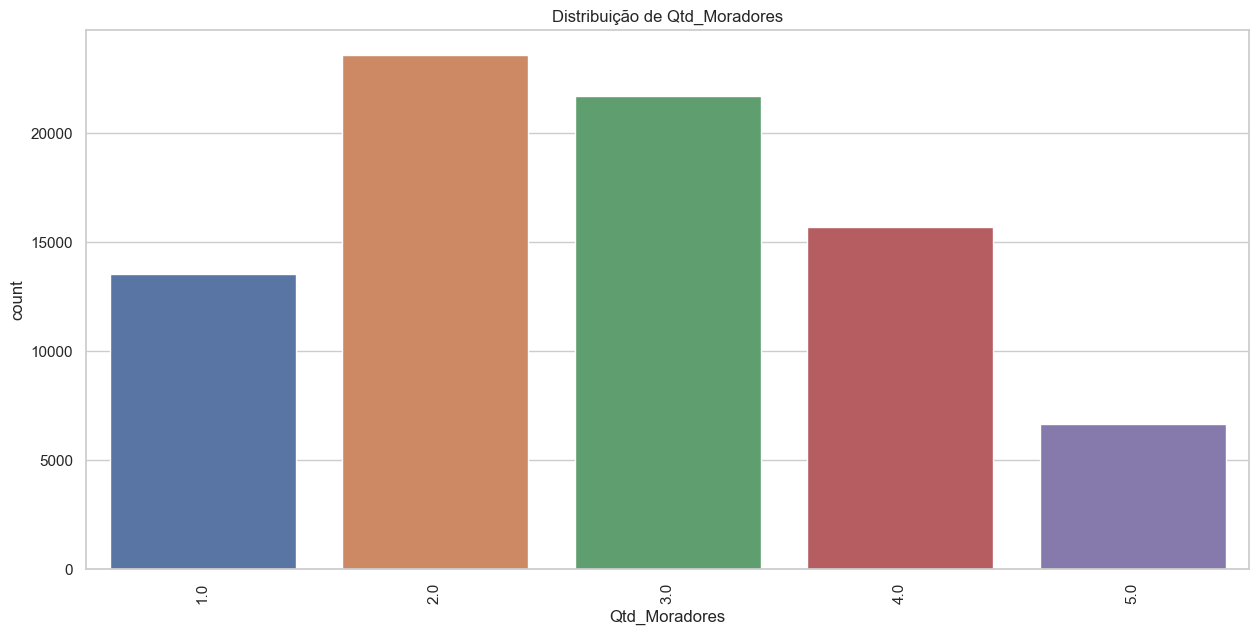

Frequente:  2.0


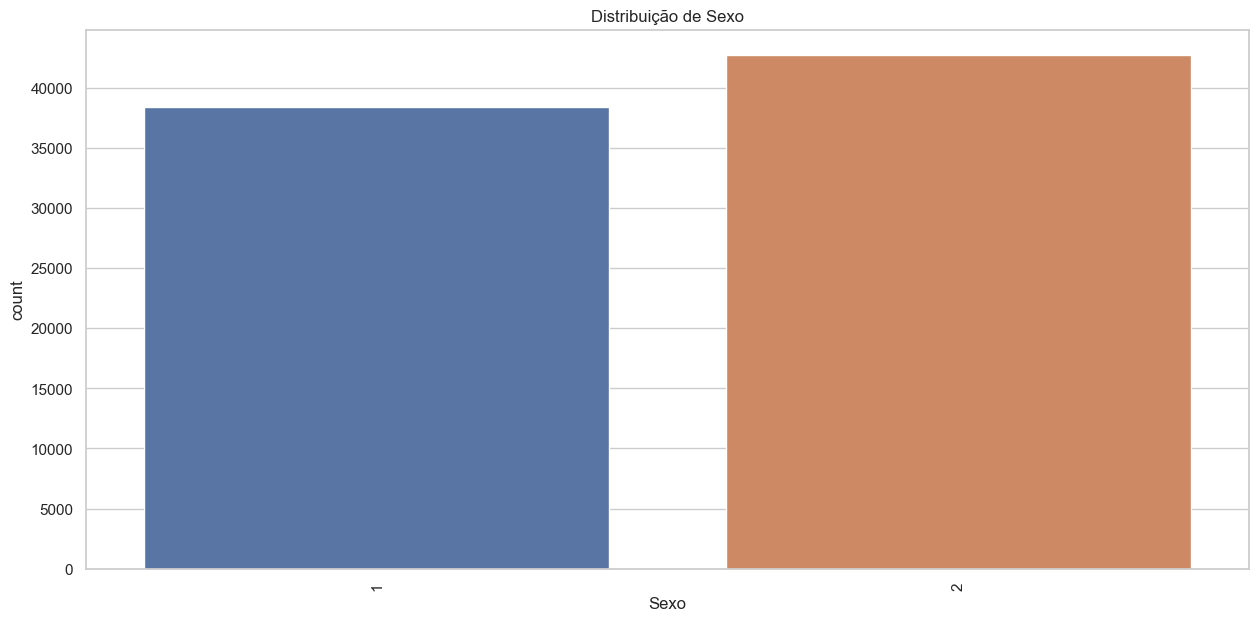

Frequente:  2


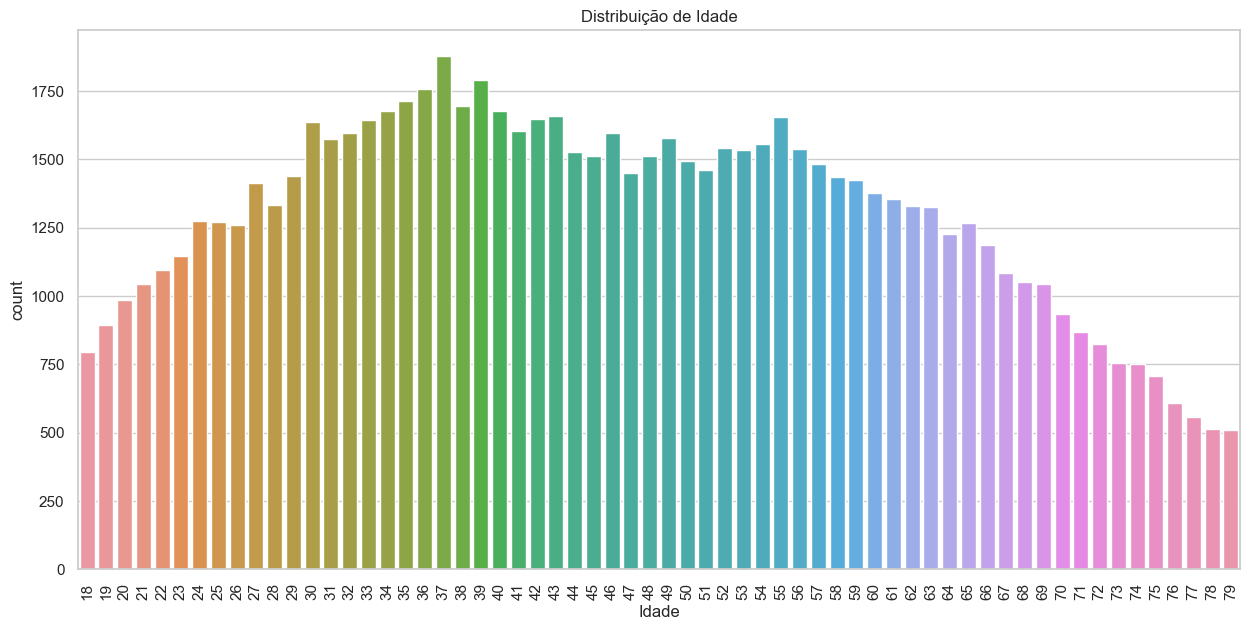

Frequente:  37


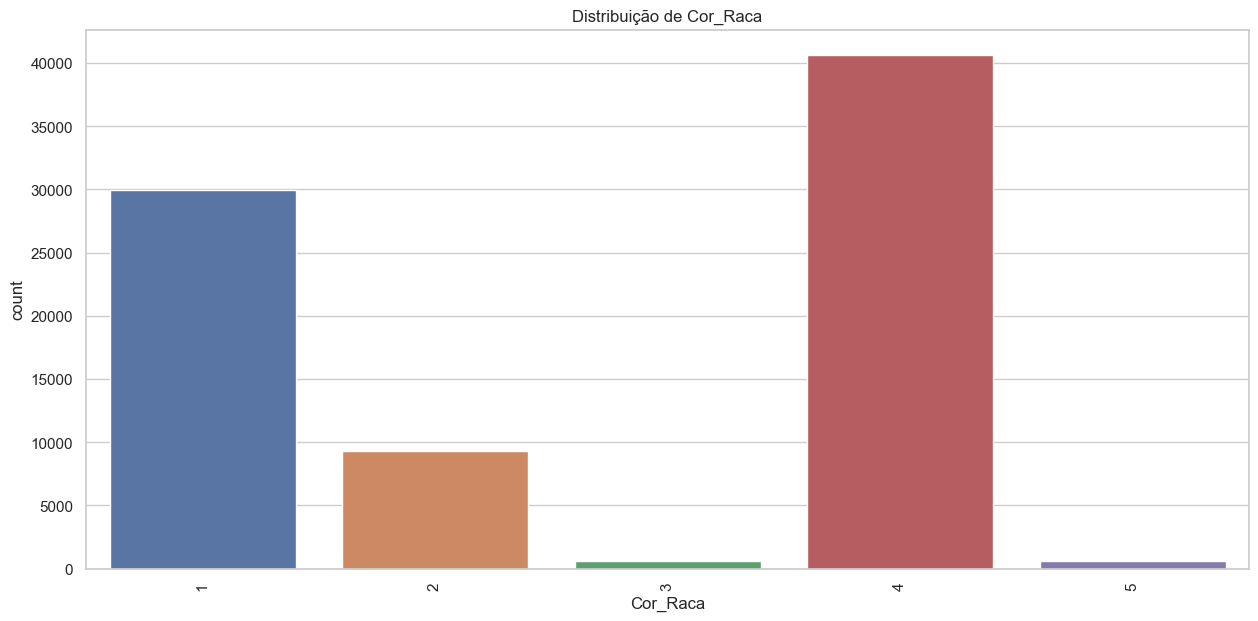

Frequente:  4


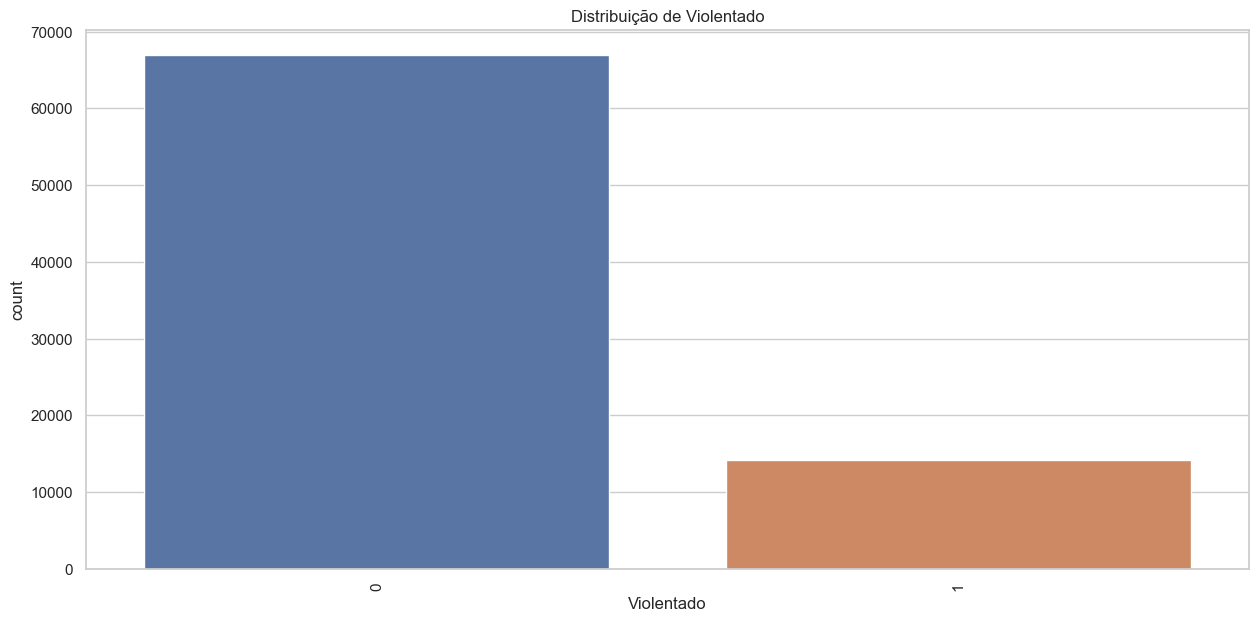

Frequente:  0


In [57]:
# plot a distribuition graph of each column

def plot_distribuition(df):
    for col in df.columns:
        plt.figure(figsize=(15,7))
        plt.title(f'Distribuição de {col}')
        plt.xticks(rotation=90)
        sns.countplot(data=df, x=col)
        plt.show()
        print('Frequente: ', df[col].mode()[0])
        
plot_distribuition(violencia_model)

In [58]:
X = violencia_model.loc[:, violencia_model.columns != 'Violentado']
Y = violencia_model.loc[:, violencia_model.columns == 'Violentado']

In [59]:
# %pip install imblearn
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X, os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['Violentado'])

# Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of non-violentado in oversampled data",len(os_data_y[os_data_y['Violentado']==0]))
print("Number of violentado",len(os_data_y[os_data_y['Violentado']==1]))
print("Proportion of non-violentado data in oversampled data is ",len(os_data_y[os_data_y['Violentado']==0])/len(os_data_X))
print("Proportion of violentado data in oversampled data is ",len(os_data_y[os_data_y['Violentado']==1])/len(os_data_X))


length of oversampled data is  93640
Number of non-violentado in oversampled data 46820
Number of violentado 46820
Proportion of non-violentado data in oversampled data is  0.5
Proportion of violentado data in oversampled data is  0.5


In [60]:
violencia_model_vars = violencia_model.columns.values.tolist()
y = ['Violentado']
X = [i for i in violencia_model_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False  True  True False False]
[4 1 1 2 3]


In [61]:
cols = ['Qtd_Moradores', 'Sexo']

X = os_data_X[cols]
y = os_data_y['Violentado']

# Implementando o modelo de regressão logística

In [62]:
# Converting int64 to float64
X = X.astype('float64')

In [63]:
import statsmodels.api as sm

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.692704
         Iterations 3
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.001      
Dependent Variable: Violentado       AIC:              129733.5757
Date:               2022-11-22 18:24 BIC:              129752.4702
No. Observations:   93640            Log-Likelihood:   -64865.    
Df Model:           1                LL-Null:          -64906.    
Df Residuals:       93638            LLR p-value:      8.0889e-20 
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     3.0000                                        
-------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Qtd_Moradores   0.0382    0.0045   8.4258  0.0000   0.0293   0.0471
Sexo           -0.0773    0.0085  -9.0457  0.0000

# Logistic Regression Model Fitting

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [65]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.52


# Matriz de confusão

In [66]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7217 6827]
 [6750 7298]]


In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.51      0.52     14044
           1       0.52      0.52      0.52     14048

    accuracy                           0.52     28092
   macro avg       0.52      0.52      0.52     28092
weighted avg       0.52      0.52      0.52     28092



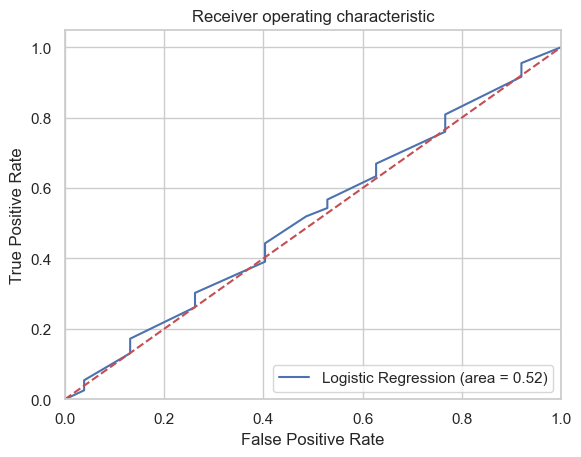

In [68]:
# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()